## THESIS PART 1 - PREMILINARY RESULTS:

The purpose of this part is to show the results and code for our pairs trading strategies.

1.  Getting the pipeline and correlation matrix - get 250 most highly correlated pairs
2.  Getting and ingesting data
3.  Linear regression and checking cointegration relationshsips on the residuals

Part 4, Simulation:
 
- 4,1: Simulations for 2016, 2017 and 2018
- 4,2: Simulation for checking bands
- 4,3: Simulation for moving windows; 15, 30, 45, 60, 90, 120, 252



### SECTION 1

A pipline is a multi index dataframe where the primary index is the date and the secondary index are the stock symbols, where we have the closing values of the stocks. Moreover, we want to investigate how historic data from '2014-01-01' to '2015-01-01' i.e. whether the last year of 2014 will provide any use for trading in the year 2015, 2016, 2017 and even in 2018.

In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
import zipline
from zipline.api import order_target, record, symbol, symbols, order_target_percent, schedule_function, date_rules, set_benchmark, set_cancel_policy


years = [2015, 2016, 2017, 2018]
bands = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]
windows = [15, 30, 45, 60 ,90, 120, 252, 504]

file_path = '/Users/cemalarican/Desktop/THESIS/PART 1/'
file_path_daily = '/Users/cemalarican/Desktop/THESIS/daily/'

import sys  
sys.path.insert(0, '/Users/cemalarican/Desktop/THESIS/')

from pipeLine import Pipeline

In [2]:
pipe_line = Pipeline(start_date='2014-01-01', end_date='2015-01-01', field='adj_close').make_pipeline()
pipe_line.shape

(252, 6718)

In [5]:
pipe_line

adj_close                                                        \
symbol              A       AABA      AACG       AADR       AAIT        AAL   
time                                                                          
2014-01-02  38.355574  10.877354  0.426140  36.142392  31.576764  23.904122   
2014-01-03  38.840051  11.022971  0.425544  36.209850  31.280454  25.016380   
2014-01-06  38.648990  10.970769  0.426627  35.929163  30.717465  25.478250   
2014-01-07  39.201703  11.242771  0.434207  36.210238  30.431032  25.360426   
2014-01-08  39.843123  11.270246  0.438538  36.345929  30.816137  26.043805   
2014-01-09  39.856771  11.242771  0.433124  36.229622  30.460663  27.731044   
2014-01-10  40.211599  11.327944  0.433124  36.297468  31.823590  27.665063   
2014-01-13  40.211599  10.987254  0.426627  35.815279  31.645903  27.005248   
2014-01-14  40.859843  11.303216  0.425544  36.277114  31.971449  27.212619   
2014-01-15  41.173729  11.283984  0.425544  36.273237  32.001475  27.184341   
2014-01-16  41.282907  11.083416  0.425544  36.312006  31.428609  27.655637   
2014-01-17  41.426203  10.992749  0.422296  36.160226  32.090368  28.296599   
2014-01-21  41.521734  10.858121  0.428793  36.384698  31.290430  28.899858   
2014-01-22  41.576323  11.039456  0.433124  36.520002  31.833566  29.408857   
2014-01-23  40.580074  10.822404  0.422307  36.026085  31.774205  29.550246   
2014-01-24  39.488295  10.415774  0.433124  35.066552  31.043406  28.654784   
2014-01-27  39.781711  10.069589  0.422296  34.796914  30.332262  28.447414   
2014-01-28  39.645238  10.500946  0.428793  34.872708  30.352016  30.125227   
2014-01-29  39.338175   9.586029  0.428793  34.572248  29.828535  31.086670   
2014-01-30  40.607369   9.701424  0.433124  34.983587  30.174230  31.859595   
2014-01-31  39.679356   9.893199  0.433124  35.127032  29.868043  31.623947   
2014-02-03  38.314632   9.588776  0.427959  34.403603  29.482841  32.010410   
2014-02-04  39.447353   9.797586  0.427710  34.882400  30.312410  32.095243   
2014-02-05  39.188056   9.750879  0.427710  34.504402  30.144599  31.859595   
2014-02-06  39.774887   9.956941  0.424462  35.144090  30.756973  32.670224   
2014-02-07  40.545956  10.228944  0.429876  35.135367  30.273000  33.622241   
2014-02-10  40.266188  10.374561  0.424462  35.427104  30.105091  33.537408   
2014-02-11  40.757488  10.577876  0.413634  35.722524  31.544664  33.113242   
2014-02-12  40.866666  10.470724  0.416449  35.432823  30.855743  32.698502   
2014-02-13  40.996315  10.583371  0.428793  35.619011  31.437400  33.014270   
...               ...        ...       ...        ...        ...        ...   
2014-11-18  38.790044  14.218314  0.460688  36.733274  33.337992  42.678692   
2014-11-19  38.790044  13.896857  0.460688  36.674859  33.030625  41.778698   
2014-11-20  39.227383  14.080939  0.454924  36.606708  33.029636  41.835540   
2014-11-21  40.168612  14.023242  0.457144  37.275170  33.029636  41.030281   
2014-11-24  40.168612  14.240294  0.455975  37.025349  33.356770  40.935545   
2014-11-25  40.605950  14.210072  0.460688  37.228828  33.375548  41.826066   
2014-11-26  40.634472  14.267769  0.454782  37.370192  33.375548  42.602903   
2014-11-28  40.634472  14.215567  0.458326  37.370192  33.375548  45.975515   
2014-12-01  39.541126  13.764977  0.457144  36.587237  33.800526  45.359729   
2014-12-02  39.911913  13.921584  0.439426  37.220065  33.769888  45.340782   
2014-12-03  40.149597  13.814432  0.414619  37.220065  33.769888  45.700780   
2014-12-04  40.187626  13.850149  0.389813  37.157172  33.816833  47.036561   
2014-12-05  40.216148  14.009504  0.367369  37.259009  33.800526  48.324974   
2014-12-08  39.465067  13.633097  0.389813  37.044820  33.800526  48.144975   
2014-12-09  39.360486  13.877624  0.398082  37.044820  33.148235  45.767095   
2014-12-10  38.352705  13.519075  0.403988  36.022559  33.148235  46.363934   
2014-12-11  38.618911  13.721017  0.403988  36.087983  33.1482

Our pipeline is consists of 252 days, where each day consist of the same 6718 stocks. Next we get the correlation matrix of 6718 x 6718 enteries

In [5]:
# CORR MATRIX 
corr_matrix = pipe_line.corr()
corr_matrix.shape

(6718, 6718)

In [6]:
corr_matrix.head()

adj_close                                                    \
symbol                   A      AABA      AACG      AADR      AAIT       AAL   
          symbol                                                               
adj_close A       1.000000  0.197615  0.048086  0.409691  0.282318  0.162524   
          AABA    0.197615  1.000000 -0.336905 -0.120292  0.099428  0.510900   
          AACG    0.048086 -0.336905  1.000000  0.442429  0.643138  0.030162   
          AADR    0.409691 -0.120292  0.442429  1.000000  0.735692  0.410036   
          AAIT    0.282318  0.099428  0.643138  0.735692  1.000000  0.549610   

                                                            ...               \
symbol                AAMC       AAN      AAOI      AAON    ...          ZNH   
          symbol                                            ...                
adj_close A       0.080919  0.140919 -0.127878  0.492246    ...     0.199760   
          AABA   -0.659993 -0.386970 -0.706532  0.223597    ...     0.881574   
          AACG   -0.164704 -0.062610  0.354780 -0.117704    ...    -0.431542   
          AADR   -0.063288  0.430866  0.476223  0.374267    ...    -0.144622   
          AAIT   -0.491473  0.021505  0.112397  0.286855    ...     0.080904   

                                                                              \
symbol                 ZQK      ZROZ       ZSL       ZTR       ZTS        ZU   
          symbol                                                               
adj_close A      -0.003495 -0.165040 -0.045775  0.196167  0.187583 -0.150931   
          AABA   -0.491982  0.637414  0.823351  0.349338  0.904097 -0.483933   
          AACG   -0.439906  0.182922 -0.205649  0.469251 -0.063359 -0.117440   
          AADR   -0.148035  0.008172 -0.321110  0.674122  0.019508 -0.051491   
          AAIT   -0.676923  0.483944  0.010201  0.875775  0.377998 -0.437895   

                                                
symbol                ZUMZ       ZVO        ZX  
          symbol                                
adj_close A      -0.019495  0.123653  0.105542  
          AABA    0.727255 -0.461663 -0.769215  
          AACG    0.151409 -0.390944 -0.001853  
          AADR    0.121250 -0.160863  0.050798  
          AAIT    0.508043 -0.590399 -0.362636  

[5 rows x 6718 columns]

In [35]:
corr_matrix.loc['adj_close'].loc['IVV'].adj_close['IWB']


0.999053965928032

In [ ]:
corr_matrix.plot()

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
f = plt.figure(figsize=(80, 80))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14, rotation=45)
plt.yticks(range(corr_matrix.shape[1]), corr_matrix.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.savefig('Correlation_universe.png')
plt.show()


We create a function to get the highest correlated pairs that are between 0.99 and 1. We get 2472 highly correlated pairs, it might look a lot, but there are (6718 choose 2) possible pairs to choose from. The function returns a list of tuples of highly correlated pairs, (Stock1, Stock2). When we regress these pairs in later sections, so we keep this structure: y = stock1 and x = stock2.

In [ ]:
def get_high_corr(upper_band, dataset):
    """ Returns a list of tuples of higly correlated stocks: (Stock1, Stock2).
        We will keep this format for sequential calculations. """
    
    list_of_high_corr = []
    for i in range(len(dataset)):
        for j in range(i+1, len(dataset)):
            if dataset.iloc[i,j] > upper_band and dataset.iloc[i,j] < 1.0:
                list_of_high_corr.append((dataset.iloc[i].name[1],dataset.iloc[j].name[1], dataset.iloc[i,j]))
                
    
    return list_of_high_corr

In [ ]:
pos_set = get_high_corr(0.99, corr_matrix)

In [ ]:
pos_set[:10]

In [ ]:
len(pos_set)

Next we sort the highly correlated pairs in descending order, and choose the 250 highest correlated pairs

In [ ]:
sorted_pos_set = []
for i in sorted(pos_set, key=lambda x: x[2]):
    sorted_pos_set.append(i)

In [ ]:
sorted_pos_set

In [ ]:
def pairs_without_corr(data):
    new_list = []
    for i in data:
        new_list.append((i[0], i[1]))
    return new_list

In [ ]:
pairs = pairs_without_corr(sorted_pos_set)
pairs

In [ ]:
len(pairs)

In [ ]:
max_corr_pair = pairs[-250:]
max_corr_pair

In [ ]:
len(max_corr_pair)

In hindsight, when downloading the data, we encountered some technical problems. Using the Quantopian Zipline package, ingesting the indle_stocks below wasnt possible. So we removed all pairs that had either one or both of these stocks. So the pairs to investigate reduced from 250, to 232.

In [ ]:
# IN HINDSIGHT WE HAD TO REMOVE SOME STOCKS DUE TO SOME TECHNICAL ERRORS:
idle_stocks = ['ABX', 'BHGE', 'BHI', 'BRK', 'BRK_A', 'BWS', 'CAL', 'CYTX', 'FSRV', 'GOLD', 'HCP', 'HRG', 'JEF', 'LUK', 'MDR',
              'MDRIQ', 'PEAK', 'SPB']

In [ ]:
copy_pairs = max_corr_pair.copy()

for item in copy_pairs:
    stock1, stock2 = item
    for second_item in idle_stocks:
        if stock1 == second_item:
            copy_pairs.remove(item)

In [ ]:
for item in copy_pairs:
    stock1, stock2 = item
    for second_item in idle_stocks:
        if stock2 == second_item:
            copy_pairs.remove(item)

In [ ]:
copy_pairs[:10]

In [ ]:
len(copy_pairs)

In [ ]:
copy_pairs

Writing the pairs to a csv file

In [ ]:
csvfile=open(file_path+'/pairs_to_investigate.csv','w', newline='')
obj=csv.writer(csvfile)
             
for row in copy_pairs:
    obj.writerow(row)
        
csvfile.close()

### Section 2 : getting data and ingesting.

We have premium End Of Day data from Quandl. With more than 16.000 US stocks, ranging from 1962 to 2020, from 4 different exchanges. Thus we have a .csv file with 35 million enteries, in the function below we slice and dice the file to for only the stocks that we need (i.e. the copy_pairs list)

In [12]:
data_c = pd.read_csv('/Users/cemalarican/Desktop/THESIS/EOD.csv', sep=',',
                   usecols=[0,1, 2, 3, 4, 5, 6, 7, 8], 
                   names=['symbol', 'time', 'div', 'split', 'open', 'high', 'low', 'close', 'volume'])
#                      usecols = [0, 1, 2, 3, 4, 5, 6, 7, 8],
#                      names=['symbol', 'time', 'div', 'split', 'open', 'high', 'low', 'close', 'volume'])

In [16]:
col_names=['symbol', 'time', 'open', 'high', 'low', 'close', 'volume', 'div', 'split']
data_c.columns = col_names
data_c

,symbol,time,open,high,low,close,volume,div,split
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0
5,A,1999-11-26,40.88,41.50,40.75,41.19,1237100.0,0.0,1.0
6,A,1999-11-29,41.00,42.44,40.56,42.13,2914700.0,0.0,1.0
7,A,1999-11-30,42.00,42.94,40.94,42.19,3083000.0,0.0,1.0
8,A,1999-12-01,42.19,43.44,41.88,42.94,2115400.0,0.0,1.0
9,A,1999-12-02,43.75,45.00,43.19,44.13,2195900.0,0.0,1.0


In [17]:
data_s = data_c.groupby('symbol')
data_s
print(len(data_s))

14050


In [18]:
list_of_tickers = list(set(data_c['symbol']))
list_of_tickers

['FITBP',
 'IMMU',
 'CTEST_C',
 'BCDA',
 'JDST',
 'CRZO',
 'RSYS',
 'NVG',
 'TMUS_P_A',
 'ABR_P_C',
 'RQI_R_W',
 'ALV_W',
 'BIOX_WS',
 'QEMM',
 'JLL',
 'RLH_P_A_CL',
 'ARI_P_C',
 'ISDX',
 'GOMO',
 'IGSB',
 'KEGX',
 'MQY',
 'VFH',
 'HRT',
 'BCS_P_CL',
 'NTX_P_C',
 'LTSF',
 'FLXN',
 'XPLR',
 'HDNG',
 'AFQ',
 'UCC',
 'MTDR',
 'DRRX',
 'IBTI',
 'BOM',
 'RWX',
 'UNT',
 'EIG',
 'FOCS',
 'SYUT',
 'LOOP',
 'OPGN',
 'WSBF',
 'XNXPX',
 'MBINO',
 'TNDM',
 'CETXW',
 'SNNA',
 'EQ',
 'OBE',
 'HURN',
 'WTRH_',
 'IMNP',
 'MKTO',
 'PNFP',
 'XBLJX',
 'KORS',
 'NGS',
 'GLU',
 'DLR_P_J',
 'SRDX',
 'OPRA',
 'YDKN',
 'PXSV',
 'DRTX',
 'AOR',
 'NTIP',
 'SNC',
 'AGD',
 'XVKIX',
 'WIRE',
 'DFNSU',
 'AHGP',
 'MNKD',
 'SOYB',
 'FSP',
 'TNTRQ',
 'AFGB',
 'MRDNW',
 'ACWX',
 'CRTN',
 'QKLS',
 'PHGE_U',
 'TLP',
 'CCUR',
 'JPM_P_B',
 'AUBN',
 'HSAC',
 'NXP',
 'APY',
 'ECCZ',
 'AMCR',
 'AGZ',
 'ADSW',
 'AIA',
 'PULS2',
 'HYLB',
 'BFS_P_A',
 'GBL',
 'SRRK',
 'DG',
 'AMH_P_F',
 'HBANP',
 'RPT_P_D',
 'PSCE',
 'VAR',
 'IB

In [19]:
# unpair_stocks = list(set([ticker for symbols in copy_pairs for ticker in symbols]))

for i in range(len(list_of_tickers)):
    ticker = list_of_tickers[i]

    stock = data_s.get_group(ticker)
    stock.set_index(['time'], inplace=True)
    stock_i = list(stock.index)
    
    stock.loc[stock_i[0]:stock_i[-1], ['open', 'high', 'low', 'close', 'volume', 'div', 'split']].to_csv('/Users/cemalarican/Desktop/BACKTESTING/daily/' + ticker + '.csv')
  

In [ ]:
len(unpair_stocks)

Once, the each stock is downloaded in csv format. You would have to register it in the extension.py folder of the Zipline package, and name your data. Then you have to go to terminal and ingest the data. Our data bundle is called 'eod-csvdir'. So the command you would have to type is: **zipline ingest -b eod-bundle**

### SECTION 3: LINEAR REGRESSION AND DETERMINIG COINTEGRATION RELATIONSHIPS

Next we create some linear regression, get_price functions and combine them to regress over all pairs. Then we create a function where we use the ADF test on the residuals to determine whether there is a cointegration relationship. Note that we only base these regressions and coint relationshsips on the last half year of 2014, for future trading.

In [ ]:
# pipeline_prices = Pipeline().make_price_pipeline()

In [1]:
### LINEAR REGRESSIONS:

import statsmodels.api as sm
from statsmodels import regression
import math

def linreg(x,y):
    x = sm.add_constant(x)
    m = sm.OLS(endog=y, exog=x, missing='drop').fit()
    return m

def get_price(ticker, start, end, pipeline=pipe_line):
    return pd.Series(data=pipeline.loc[start:end].adj_close[ticker]).rename(ticker, inplce=True)

def regress_all_pairs(dataset, start, end):
    results = []
    for i in dataset:
        ''' - stock1 = y, stock2 = x 
            Return: list of tuples containing: (stock1, stock2, constant, coeff, list of residuals)'''
        
        r = linreg(x = get_price(i[1], start, end),y = get_price(i[0], start, end))
        results.append((i[0], i[1], r.params[0], r.params[1], list(r.resid)))
    
    return results

NameError: name 'pipe_line' is not defined

In [ ]:
start = '2014-01-01'
end = '2015-01-01'
pairs_reg = regress_all_pairs(copy_pairs,'2014-01-01','2015-01-01')
pairs_reg

In [ ]:
len(pairs_reg)

In [ ]:
## Checking for Coint:
import statsmodels
from statsmodels.tsa.stattools import adfuller

def check_adf(dataset):
    """ Output: stock1, stock2, constant, coeff, stat or not stat, p-value"""
    results = []
    count_stat = 0
    count_non_stat = 0
    
    for item in dataset:
        r = adfuller(item[4])
        labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Observations used']
        if r[1] <= 0.05:
            count_stat += 1
            tr = (item[0], item[1], item[2] ,item[3], 'STAT', r[1])
            results.append(tr)
        else:
            count_non_stat += 1
            tr = (item[0], item[1], item[2],item[3], 'NON-STAT', r[1])
            results.append(tr)
    
    print('# stationary: {}'.format(count_stat))
    print('# non stationary: {}'.format(count_non_stat))
    return results

In [ ]:
coint_pairs = check_adf(pairs_reg)
coint_pairs

In [ ]:
coint_pairs

csvfile=open(file_path+'/coint_pairs_to_investigate.csv','w', newline='')
obj=csv.writer(csvfile)
obj.writerow(['stock1', 'stock2', 'constant', 'coeff', 'stat', 'p-value'])
             
for row in coint_pairs:
    obj.writerow(row)
        
csvfile.close()

In [4]:
# filepath_coint = '/Users/cemalarican/Desktop/THESIS/coint_pairs_to_investigate.csv'
coint_pairs = pd.read_csv(file_path + 'coint_pairs_to_investigate.csv')
coint_pairs

,stock1,stock2,constant,coeff,stat,p-value
0,MZZ,SMDD,1.721706e+01,0.653397,NON-STAT,6.567685e-02
1,EDV,UBT,1.901886e+01,1.156738,NON-STAT,1.173429e-01
2,IVV,IWB,-8.024626e+00,1.863519,STAT,2.437148e-02
3,DGL,SGOL,-3.365232e+00,3.555141,STAT,2.326552e-02
4,PHDG,VQT,-7.188207e-01,0.170467,STAT,5.418133e-07
5,IWV,SCHB,4.985746e+00,2.350143,NON-STAT,1.634537e-01
6,IWB,SPY,4.051654e+00,0.538618,STAT,1.627052e-02
7,IWB,SSO,4.734292e+01,0.912445,STAT,1.948852e-03
8,CURE,RXL,-1.056283e+01,0.340761,STAT,7.737721e-03
9,EUSA,VV,3.657650e-01,0.467233,STAT,1.498560e-13


In [5]:
len(coint_pairs)

239

## Some Theory:

#### Methodology of selecting pairs:

We use 1 year of trading data, or 252 days of historic data in order to form the pairs. Between 2014-01-01 and 2015-01-01, we have over 6700 stocks to choose from and combine possible pairs, which there are $\frac{N(N-1)}{2}$ of. Vidyamurphy suggest several methods of identifying of possible pairs; Through correlation of 1 (perfect correlation), Cointegration and Distance method. We combine the fist 2. When checking by correlation, we find that there are more than 2000 pairs that are highly correlated, betwen 0.99 and 1. We selected the 250 most highly correlated ones. Althought correlation does show co-movement, it does not necessarily imply long term relationships, also known as mean reversion. This is why we introduce a further process selection process of testing cointegration. 

#### Cointegration:

Was first introduced by Engle and Granger in 1987, for which they later received a Nobel Prize in economics in 2003. It describes a statistical relationship between non-stationary time series that are of order $I(d)$, where a linear combination of these times series would create a single stationary time series.

Moreover:

Let, $Y_{t} = (y_{1,t}, ..., y_{n,t})^{\prime}$ denote a (n x 1) vector of $I(1)$ time series. Then $Y_{t}$ is said to be cointegrated if there exists an (n x 1) vector $\beta = (\beta_{1}, ..., \beta_{n})$ such that:
$$
\beta^{\prime}Y_{t} = \beta_{1}y_{1,t} + ... + \beta_{n}y_{n,t} = \mu + \epsilon_{t}, \text{ is of order } I(0)
$$

It can be argued that for a cointegrated time series, it has a long-run equilibrium and that the relations between the time series can not drift too far apart, as the underlying economic or mathematical forces will unwind deviations back to the long-run equilibrium. Where, $\mu$ is the long-run equilibrium and $\epsilon_{t}$ represents the cointegration error, which denotes any short term deviations at time $t$, it is import to note that $\epsilon_{t}$ is stationary, we may also assume that it is a white noise, that is $\epsilon$ ~ $N(0, \sigma_{\epsilon}^{2})$, we see that because, suppose we solve for $\epsilon_{t}$, then:

$$
\epsilon_{t} = \beta^{\prime} Y_{t} - \mu 
$$

Then for the right hand side to be stationary, i.e. the cointegrated time series minus a constant value, $\epsilon_{t}$ needs to be $I(0)$. Taking the expected value $\mathbb{E}(\epsilon_{t}) = \mathbb{E}(\beta^{\prime}Y_{t}) - \mu = 0$. 

#### Cointegration in the context of Pairs Trading:

Moreover, there does not only exist an unique $\beta$ for which the combination of time series is cointegrated. That is, $\exists, c \in \mathbb{R} | c\beta^{\prime}Y_{t} = \beta^{*}Y_{t}$ ~ $I(0)$. Suppose now that the scalar vector $\beta^{\prime}$ equals $(1, -\beta_{2}, ..., - \beta_{n})$ such that:

$$
\beta^{\prime}Y_{t} \rightarrow y_{1, t} - \beta_{2} y_{2,t}, ..., -\beta_{n} y_{n, t} = \mu + \epsilon_{t} \text{ ~ } I(0)
$$
Rewriting as:

$$
\beta^{\prime}Y_{t} \rightarrow y_{1, t} = \mu + \beta_{2} y_{2,t}, ..., + \beta_{n} y_{n, t} + \epsilon_{t} \text{ ~ } I(0)
$$

Suppose we have we have two stocks that are of order $I(1)$, that have the following relation:

$$
stock_{1,t} = \alpha + \beta stock_{2,t} + u_{t} \text{ where } u_{t} \text{ ~ } \mathcal{N}(0, \sigma_{u}^{2}) 
$$

Let the cointegrating vector be $\beta^{\prime} = (1, -\beta)$, then we create a single stationary time series, also known as the spread:

$$
spread_{t} = stock_{1,t} - \beta stock_{2,t} = \alpha + u_{t} \text{ ~ } I(0)
$$

Coming back to the second checking process, is that we use OLS to estimate the needed parameters, and use the Augmented Dicky Fuller test to test for cointegration on the pair of stocks from the residuals produced of the OLS, if the residual values are stationary then we have a cointegration relationship/

$$
\hat u_{t} = stock_{1,t} - \hat stock_{1,t} = stock_{1, t} - \hat \alpha - \hat \beta stock_{2,t} 
$$


$$
\hat spread_{t} = \hat stock_{1,t} - \hat \beta stock_{2,t} = \hat \alpha + \hat u_{t} \text{ ~ } I(0)
$$

So the long-run equilibrium is $\hat \alpha $ and short term deviations are $\hat u_{t}$ and $\mathbb{E}(spread_{t}) = \mathbb{E}(stock_{1,t} - \hat \beta stock_{2,t}) = \hat \alpha$

### Trading Rules:

Pairs Trading is a long and short strategy, mean-reversion is essential to its success. That is knowing that the spread will return to its long-run mean. If there is a positive deviation from the mean, the spread (or portfolio) is overvalued, that is stock 1 is overvalued in terms of stock2. If the deviation is large enough a trigger point is reached and the algorithm; sells (short) stock1 and buys (long) $\beta$ stock2. Vice versa if the spread decreases, that is stock1 is undervalued in terms of stock2. There are ofcourse 2 time period that we need to consider. The open and close period. The trade is place when the spread value is deviated at time $t$ and close at time $t+n$ when it has reached back to the mean. 


-- insert graph as example


Not that we have note specified the weights, that is $w_{1} + w_{2} = 1$ with $w_{1} = \hat \beta w_{2}$. Then the profit made. Suppose 

$$
profit_{t+n} = [stock_{1,t} - stock_{1, t+n}] + \hat \beta[stock_{2,t} - stock_{2, t+n}] 
$$
$$
 = [stock_{1,t} - \hat \beta stock_{2,t}] - [stock_{1,t+n} - \hat \beta stock_{2, t+n}] \\
 = spread_{t} - spread_{t+n}
$$

### SECTION 4: Simulations

Now that we have the information that we need, we simulate each pair in the list and compare overall performance for 1 year, 2015-01-01 to 2016-01-01.

How does the algorithm work? Unless specified, it works as follows. The spread is defined as the difference between stock 1 and stock 2. Of which the mean and standard deviation is already calculated. Then we introduce the zscore: \begin{equation*} zscore_{t} = \frac{spread_t - \mu}{\sigma} \end{equation*}

In addition, we hold our portfolio weights as $w_{1} + w_{2} = 1$ with $w_{1}=w_{2}=0.5$ Whenever, the spread deviates by 1 or more, we long stock 1 and short stock 2. Vice versa if zscore deviates by -1 or more.

In the next section we will change some of the parameters. Moreover, in later discussion we will introduce linear relationship between the pair. When we will hold the the weights as $w_{1} + \beta w_{2} = 1$ and the spread as: $spread = stock_{1} - \beta stock_{2}$ and then trade when the zscore of the spread deviates.

In [8]:
for pairs in coint_pairs[2:3]:
    print(pairs)

stock1
stock2
constant
coeff
stat
p-value


In [14]:
pairs_sim = pd.DataFrame()
main_data = pd.DataFrame()

for p in range(len(coint_pairs[:1])):
    """ pair = (stock1, stock2, constant, coeff, stat, pvalue)"""
    
    s1 = coint_pairs.iloc[2][0]
    s2 = coint_pairs.iloc[2][1]
    beta = coint_pairs.iloc[2][3]
    stat = coint_pairs.iloc[2][4]
    beta = round(beta, 2)
    spread = (get_price(ticker=s1, start='2014-01-01', end='2015-01-01') - beta* get_price(ticker=s2, start='2014-01-01', end='2015-01-01'))
    spread_mean = spread.mean()
    spread_std = spread.std()
    print('stocks: {}'.format(s1, s2))
    
    def initialize(context):
        """ pair[0] == stock2, pair[1] == stock1 """
        context.p1 = symbols(s1, s2)
        context.long_on_spread = False
        context.shorting_on_spread = False


    def handle_data(context, data):
        portfolio_value = context.portfolio.portfolio_value

        pair1 = context.p1
        
        w2 = round((1/(beta+1)),2)
        w1 = 1 - w2
        print('weights: {} for pair: {} vs {}'.format((w1, w2), pair1[0] , pair1[1] ))

        current_spread = data.current(pair1[0], 'close') - beta* data.current(pair1[1], 'close')
        print('current spread: {}'.format(current_spread))

        if spread_std > 0:

            zscore = (current_spread - spread_mean) / spread_std
            print('mean: {}, std: {} -- zscore: {}'.format(spread_mean, spread_std, zscore))
  
            # ENTRY CASE 1
            if zscore > 1.0 and not context.shorting_on_spread:
                order_target_percent(pair1[0], -w1)
                order_target_percent(pair1[1], w2)
                context.shorting_spread = True
                context.long_on_spread = False
                      
            # ENTRY CASE 2:
            elif zscore < -1.0 and not context.long_on_spread:
                order_target_percent(pair1[0], w1)
                order_target_percent(pair1[1], -w2)
                context.shorting_spread = False
                context.long_on_spread = True
                      
            # STOP POSITION    
            elif abs(zscore) >= 3:
                order_target_percent(pair1[0], 0)
                order_target_percent(pair1[1], 0)
                context.shorting_spread = False
                context.long_on_spread = False
            
            # EXIT STRATEGY - REACHING MEAN REVERSION
            elif abs(zscore) <= 0.1:
                order_target_percent(pair1[0], 0)
                order_target_percent(pair1[1], 0)
                context.shorting_spread = False
                context.long_on_spread = False
                      
            print(context.portfolio.positions)
                    
            
            print('\n')

            record(z_score=zscore)
            record(sprd=spread)
            record(por=portfolio_value)


    start_time = datetime(2015, 1, 1, tzinfo=pytz.UTC)
    end_time = datetime(2016, 1, 1, tzinfo=pytz.UTC)

    perf_Algo = zipline.run_algorithm(
        start=start_time,
        end=end_time,
        initialize=initialize,
        capital_base=100000,
        handle_data=handle_data,
        data_frequency='daily',
        bundle="eod-csvdir")

#     pairs_sim[str(pair[1] + ' vs ' + pair[0] + ': ' + pair[3])] = perf_Algo.portfolio_value

stocks: IVV
weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -7.613340000000022
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: 0.1968585357646163
{}


weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -7.618180000000024
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: 0.18306707047799123
{}


weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -7.387580000000014
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: 0.8401563050017272
{}


weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -7.478880000000004
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: 0.5799991189132284
{}


weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -7.601820000000004
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: 0.2296845027278659
{}


weights: (0.65, 0.35) for pair: 

/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)
/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,


weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -8.740500000000026
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: -3.0149571692906543
{Equity(112 [IVV]): Position({'last_sale_date': Timestamp('2015-03-24 20:00:00+0000', tz='UTC'), 'asset': Equity(112 [IVV]), 'amount': 342, 'last_sale_price': 190.233, 'cost_basis': 190.3291165}), Equity(114 [IWB]): Position({'last_sale_date': Timestamp('2015-03-24 20:00:00+0000', tz='UTC'), 'asset': Equity(114 [IWB]), 'amount': -328, 'last_sale_price': 106.97500000000001, 'cost_basis': 106.92051249999999})}


weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -8.583280000000002
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: -2.566962505579323
{}


weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -8.568120000000022
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: -2.5237644448882284
{Equity(112 [IVV]): P

weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -8.617820000000023
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: -2.665383416942995
{Equity(112 [IVV]): Position({'last_sale_date': Timestamp('2015-05-15 20:00:00+0000', tz='UTC'), 'asset': Equity(112 [IVV]), 'amount': 338, 'last_sale_price': 193.633, 'cost_basis': 192.219061}), Equity(114 [IWB]): Position({'last_sale_date': Timestamp('2015-05-15 20:00:00+0000', tz='UTC'), 'asset': Equity(114 [IWB]), 'amount': -324, 'last_sale_price': 108.73700000000001, 'cost_basis': 107.8960245})}


weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -8.642020000000002
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: -2.7343407433760394
{Equity(112 [IVV]): Position({'last_sale_date': Timestamp('2015-05-18 20:00:00+0000', tz='UTC'), 'asset': Equity(112 [IVV]), 'amount': 338, 'last_sale_price': 194.204, 'cost_basis': 192.219061}), Equity(114 [IWB]): Positi

weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -8.324200000000019
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: -1.828720186063316
{Equity(112 [IVV]): Position({'last_sale_date': Timestamp('2015-07-29 20:00:00+0000', tz='UTC'), 'asset': Equity(112 [IVV]), 'amount': 338, 'last_sale_price': 192.965, 'cost_basis': 192.26108200000002}), Equity(114 [IWB]): Position({'last_sale_date': Timestamp('2015-07-29 20:00:00+0000', tz='UTC'), 'asset': Equity(114 [IWB]), 'amount': -324, 'last_sale_price': 108.22, 'cost_basis': 107.93300599999999})}


weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -8.345760000000013
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: -1.8901548950673364
{Equity(112 [IVV]): Position({'last_sale_date': Timestamp('2015-07-30 20:00:00+0000', tz='UTC'), 'asset': Equity(112 [IVV]), 'amount': 338, 'last_sale_price': 193.029, 'cost_basis': 192.26108200000002}), Equity(114 [IW

weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -7.090420000000023
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: 1.6869066819794343
{Equity(112 [IVV]): Position({'last_sale_date': Timestamp('2015-10-23 20:00:00+0000', tz='UTC'), 'asset': Equity(112 [IVV]), 'amount': -330, 'last_sale_price': 190.994, 'cost_basis': 172.94736904166308}), Equity(114 [IWB]): Position({'last_sale_date': Timestamp('2015-10-23 20:00:00+0000', tz='UTC'), 'asset': Equity(114 [IWB]), 'amount': 318, 'last_sale_price': 106.497, 'cost_basis': 96.96356875841204})}


weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -7.116500000000002
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: 1.6125923401044797
{Equity(112 [IVV]): Position({'last_sale_date': Timestamp('2015-10-26 20:00:00+0000', tz='UTC'), 'asset': Equity(112 [IVV]), 'amount': -325, 'last_sale_price': 190.555, 'cost_basis': 172.9473536570477}), Equity(114 [IWB

weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -7.000720000000001
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: 1.942504705989803
{Equity(112 [IVV]): Position({'last_sale_date': Timestamp('2015-12-04 21:00:00+0000', tz='UTC'), 'asset': Equity(112 [IVV]), 'amount': -328, 'last_sale_price': 192.953, 'cost_basis': 174.37038904860094}), Equity(114 [IWB]): Position({'last_sale_date': Timestamp('2015-12-04 21:00:00+0000', tz='UTC'), 'asset': Equity(114 [IWB]), 'amount': 316, 'last_sale_price': 107.502, 'cost_basis': 97.71774717249244})}


weights: (0.65, 0.35) for pair: Equity(112 [IVV]) vs Equity(114 [IWB])
current spread: -6.749220000000008
mean: -7.682425865301446, std: 0.3509416801922658 -- zscore: 2.6591479951602626
{Equity(112 [IVV]): Position({'last_sale_date': Timestamp('2015-12-07 21:00:00+0000', tz='UTC'), 'asset': Equity(112 [IVV]), 'amount': -320, 'last_sale_price': 191.763, 'cost_basis': 174.37036404860095}), Equity(114 [IWB

In [15]:
perf_Algo

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,shorts_count,sortino,sprd,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,z_score
2015-01-02 21:00:00+00:00,NaN,0.000000,NaN,-0.000535,NaN,NaN,0.000000,100000.000000,0.000,0.000,...,0,NaN,time 2014-01-02 -7.429702 2014-01-03 -7.46...,100000.000000,0.000,0.000,1,[],0.0,0.196859
2015-01-05 21:00:00+00:00,0.000000,0.000000,0.000000,-0.018585,0.196712,0.000000,0.000000,100000.000000,0.000,0.000,...,0,NaN,time 2014-01-02 -7.429702 2014-01-03 -7.46...,100000.000000,0.000,0.000,2,[],0.0,0.183067
2015-01-06 21:00:00+00:00,0.000000,0.000000,0.000000,-0.027829,0.139101,0.000000,0.000000,100000.000000,0.000,0.000,...,0,NaN,time 2014-01-02 -7.429702 2014-01-03 -7.46...,100000.000000,0.000,0.000,3,[],0.0,0.840156
2015-01-07 21:00:00+00:00,0.000000,0.000000,0.000000,-0.015715,0.206971,0.000000,0.000000,100000.000000,0.000,0.000,...,0,NaN,time 2014-01-02 -7.429702 2014-01-03 -7.46...,100000.000000,0.000,0.000,4,[],0.0,0.579999
2015-01-08 21:00:00+00:00,0.000000,0.000000,0.000000,0.001751,0.236039,0.000000,0.000000,100000.000000,0.000,0.000,...,0,NaN,time 2014-01-02 -7.429702 2014-01-03 -7.46...,100000.000000,0.000,0.000,5,[],0.0,0.229685
2015-01-09 21:00:00+00:00,0.000000,0.000000,0.000000,-0.006276,0.218110,0.000000,0.000000,100000.000000,0.000,0.000,...,0,NaN,time 2014-01-02 -7.429702 2014-01-03 -7.46...,100000.000000,0.000,0.000,6,[],0.0,0.413533
2015-01-12 21:00:00+00:00,0.000000,0.000000,0.000000,-0.014061,0.203320,0.000000,0.000000,100000.000000,0.000,0.000,...,0,NaN,time 2014-01-02 -7.429702 2014-01-03 -7.46...,100000.000000,0.000,0.000,7,[],0.0,0.652490
2015-01-13 21:00:00+00:00,0.000000,0.000000,0.000000,-0.016834,0.188300,0.000000,0.000000,100000.000000,0.000,0.000,...,0,NaN,time 2014-01-02 -7.429702 2014-01-03 -7.46...,100000.000000,0.000,0.000,8,[],0.0,0.210194
2015-01-14 21:00:00+00:00,0.000000,0.000000,0.000000,-0.022769,0.177393,0.000000,0.000000,100000.000000,0.000,0.000,...,0,NaN,time 2014-01-02 -7.429702 2014-01-03 -7.46...,100000.000000,0.000,0.000,9,[],0.0,0.381391
2015-01-15 21:00:00+00:00,0.000000,0.000000,0.000000,-0.031721,0.170556,0.000000,0.000000,100000.000000,0.000,0.000,...,0,NaN,time 2014-01-02 -7.429702 2014-01-03 -7.46...,100000.000000,0.000,0.000,10,[],0.0,0.660012


In [67]:
new_pipe = Pipeline().make_pipeline(first_date='2015-01-01', last_date='2016-01-01', f='adj_close')

In [79]:
ivv = get_price(ticker='IVV', start='2015-01-01', end='2016-01-01', pipeline=new_pipe)
iwb = get_price(ticker='IWB', start='2015-01-01', end='2016-01-01', pipeline=new_pipe)

In [80]:
ivv = ivv.reset_index()
iwb = iwb.reset_index()

In [83]:
df = perf_Algo[['portfolio_value', 'pnl']].reset_index()
df['IVV'] = ivv.IVV
df['IWB'] = iwb.IWB
df

,index,portfolio_value,pnl,IVV,IWB
0,2015-01-02 21:00:00+00:00,100000.000000,0.000000,186.234033,104.219237
1,2015-01-05 21:00:00+00:00,100000.000000,0.000000,182.963924,102.463295
2,2015-01-06 21:00:00+00:00,100000.000000,0.000000,181.315357,101.453401
3,2015-01-07 21:00:00+00:00,100000.000000,0.000000,183.558489,102.708945
4,2015-01-08 21:00:00+00:00,100000.000000,0.000000,186.837606,104.537672
5,2015-01-09 21:00:00+00:00,100000.000000,0.000000,185.261108,103.655152
6,2015-01-12 21:00:00+00:00,100000.000000,0.000000,183.855772,102.854515
7,2015-01-13 21:00:00+00:00,100000.000000,0.000000,183.378318,102.681651
8,2015-01-14 21:00:00+00:00,100000.000000,0.000000,182.270265,102.053879
9,2015-01-15 21:00:00+00:00,100000.000000,0.000000,180.558638,101.080377


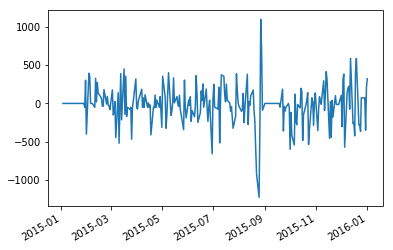

In [20]:
df.pnl.plot()

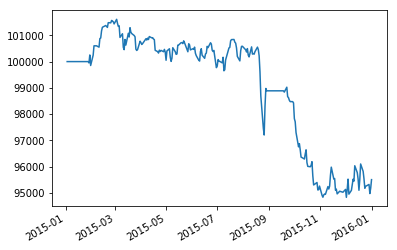

In [21]:
df.portfolio_value.plot()

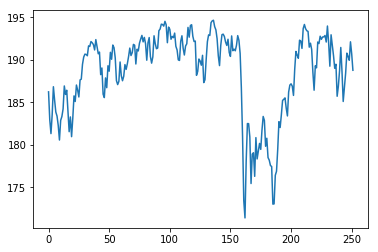

In [86]:
df.IVV.plot()

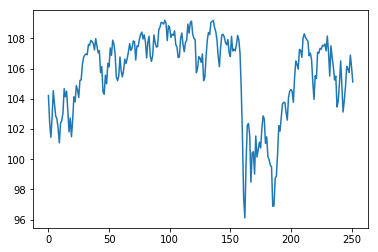

In [87]:
df.IWB.plot()

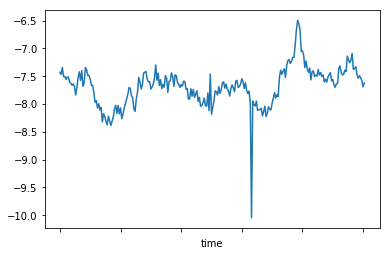

In [91]:
perf_Algo.sprd.iloc[-1].plot()

In [ ]:
print('THE RESULTS')
print(perf_Algo.portfolio_value)
#pairs_sim.to_csv(file_path + '/final_sim.csv')

In [ ]:
filepath_coint = '/Users/cemalarican/Desktop/THESIS/PART 1/coint_pairs_to_investigate.csv'
coint_pairs = pd.read_csv(filepath_coint)
coint_pairs

In [ ]:
for pairs in coint_pairs:
    print(pairs)

### 4.2 : Simulation for 1, 2, 3 and 4 year performance

In [6]:
## part 5 - check for 1 year and 2 year
for year in [2015]:
    
    main_data = pd.DataFrame()
    pairs_sim = pd.DataFrame()
    print(year)

    for p in range(len(coint_pairs)):
        
        partial_main_data = pd.DataFrame()
        
        """ coint_pairs.iloc[p] = (stock1, stock2, constant, coeff, stat, pvalue)"""
        
        stock1 = coint_pairs.iloc[p][0]
        stock2 = coint_pairs.iloc[p][1]
        beta = round(coint_pairs.iloc[p][3], 2)
        stat = coint_pairs.iloc[p][4]
        
#         print('the pairs we are going to investigate : {}'.format((stock1, stock2)))
              
        spread = get_price(ticker=stock1, start='2014-01-01' , end='2015-01-01') - beta*get_price(ticker=stock2,start='2014-01-01' , end='2015-01-01')
        spread_mean = spread.mean()
        spread_std = spread.std()

        def initialize(context):
            context.p1 = symbols(stock1, stock2)
            
            # KEEPING TRACK IF WE GO LONG OR SHORT ON THE SPREAD
            context.long_on_spread = False
            context.shorting_on_spread = False
            
            context.entry1 = False
            
            context.entry2 = False
            context.stop = False
            context.exit = False


        def handle_data(context, data):
            portfolio_value = context.portfolio.portfolio_value

            pair1 = context.p1
            s1 = pair1[0]
            s2 = pair1[1]

            w2 = round((1/(beta+1)),2)
            w1 = 1 - w2

            current_spread = data.current(pair1[0], 'close') - beta* data.current(pair1[1], 'close')

            if spread_std > 0:

                zscore = (current_spread - spread_mean) / spread_std
                
                # ENTRY CASE 1
                if zscore > 1.0 and not context.shorting_on_spread:
                    order_target_percent(s1, -w1)
                    order_target_percent(s2, w2)
                    
                    context.shorting_spread = True
                    context.long_on_spread = False
                    
                    context.entry1 = True
                    context.entry2 = False
                    context.stop = False
                    context.exit = False
                    
                    

                # ENTRY CASE 2:
                elif zscore < -1.0 and not context.long_on_spread:
                    order_target_percent(s1, w1)
                    order_target_percent(s2, -w2)
                    context.shorting_spread = False
                    context.long_on_spread = True
                    
                    context.entry1 = False
                    context.entry2 = True
                    context.stop = False
                    context.exit = False

                # STOP POSITION    
                elif abs(zscore) >= 3:
                    order_target_percent(s1, 0)
                    order_target_percent(s2, 0)
                    context.shorting_spread = False
                    context.long_on_spread = False
                    
                    context.entry1 = False
                    context.entry2 = False
                    context.stop = True
                    context.exit = False

                # EXIT STRATEGY - REACHING MEAN REVERSION
                elif abs(zscore) <= 0.05:
                    order_target_percent(s1, 0)
                    order_target_percent(s2, 0)
                    context.shorting_spread = False
                    context.long_on_spread = False
                    
                    context.entry1 = False
                    context.entry2 = False
                    context.stop = False
                    context.exit = True
                    

                record(z_score=zscore)
                record(sprd=spread)
                record(por=portfolio_value)
                record('long_spread', context.long_on_spread )
                record('short_spread', context.shorting_on_spread )
                
                record('entry1', context.entry1)
                record('entry2', context.entry2)
                record('stop', context.stop)
                record('exit', context.exit)


        start_time = datetime(2015, 1, 1, tzinfo=pytz.UTC)
        end_time = datetime(year+1, 1, 1, tzinfo=pytz.UTC)

        perf_Algo = zipline.run_algorithm(
            start=start_time,
            end=end_time,
            initialize=initialize,
            capital_base=100000,
            handle_data=handle_data,
            data_frequency='daily',
            bundle="eod-csvdir")

        pairs_sim[stock1 + ' vs ' + stock2 + ':' + stat] = perf_Algo.portfolio_value     
        partial_main_data = perf_Algo
        
        partial_main_data['symbol'] = str(stock1 + ' vs ' + stock2 + ':' + stat)
        partial_main_data.index.rename('time', inplace=True)
        partial_main_data.set_index('symbol', append=True, inplace=True)
        
        main_data = pd.concat([main_data,partial_main_data])
        
        
        
    print('finished year : {}'.format(year))
    print('dimension : {}'.format(main_data.shape))
    
    pairs_sim.to_csv(file_path + '/YEAR/pair_sim_'+ str(year) +'.csv') 
    main_data.to_csv(file_path + '/YEAR/MAIN_DATA_YEAR/pair_sim_'+ str(year) +'.csv')
    
        
print('THE END')

2015


/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


In [7]:
perf_Algo

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,sortino,sprd,starting_cash,starting_exposure,starting_value,stop,trading_days,transactions,treasury_period_return,z_score
2015-01-02 21:00:00+00:00,NaN,0.0,NaN,-0.000535,NaN,NaN,0.0,100000.0,0.0,0.0,...,None,time 2014-01-02 4.973799e-14 2014-01-03 ...,100000.0,0.0,0.0,False,1,[],0.0,0.021357
2015-01-05 21:00:00+00:00,0.0,0.0,0.0,-0.018585,0.196712,0.0,0.0,100000.0,0.0,0.0,...,None,time 2014-01-02 4.973799e-14 2014-01-03 ...,100000.0,0.0,0.0,False,2,[],0.0,0.021357
2015-01-06 21:00:00+00:00,0.0,0.0,0.0,-0.027829,0.139101,0.0,0.0,100000.0,0.0,0.0,...,None,time 2014-01-02 4.973799e-14 2014-01-03 ...,100000.0,0.0,0.0,False,3,[],0.0,0.021357
2015-01-07 21:00:00+00:00,0.0,0.0,0.0,-0.015715,0.206971,0.0,0.0,100000.0,0.0,0.0,...,None,time 2014-01-02 4.973799e-14 2014-01-03 ...,100000.0,0.0,0.0,False,4,[],0.0,0.021357
2015-01-08 21:00:00+00:00,0.0,0.0,0.0,0.001751,0.236039,0.0,0.0,100000.0,0.0,0.0,...,None,time 2014-01-02 4.973799e-14 2014-01-03 ...,100000.0,0.0,0.0,False,5,[],0.0,0.021357
2015-01-09 21:00:00+00:00,0.0,0.0,0.0,-0.006276,0.218110,0.0,0.0,100000.0,0.0,0.0,...,None,time 2014-01-02 4.973799e-14 2014-01-03 ...,100000.0,0.0,0.0,False,6,[],0.0,0.021357
2015-01-12 21:00:00+00:00,0.0,0.0,0.0,-0.014061,0.203320,0.0,0.0,100000.0,0.0,0.0,...,None,time 2014-01-02 4.973799e-14 2014-01-03 ...,100000.0,0.0,0.0,False,7,[],0.0,0.021357
2015-01-13 21:00:00+00:00,0.0,0.0,0.0,-0.016834,0.188300,0.0,0.0,100000.0,0.0,0.0,...,None,time 2014-01-02 4.973799e-14 2014-01-03 ...,100000.0,0.0,0.0,False,8,[],0.0,0.021357
2015-01-14 21:00:00+00:00,0.0,0.0,0.0,-0.022769,0.177393,0.0,0.0,100000.0,0.0,0.0,...,None,time 2014-01-02 4.973799e-14 2014-01-03 ...,100000.0,0.0,0.0,False,9,[],0.0,0.021357
2015-01-15 21:00:00+00:00,0.0,0.0,0.0,-0.031721,0.170556,0.0,0.0,100000.0,0.0,0.0,...,None,time 2014-01-02 4.973799e-14 2014-01-03 ...,100000.0,0.0,0.0,False,10,[],0.0,0.021357


### CHECKING THE BANDS: 

In [8]:
## part 5 - check for 1 year and 2 year
for band in bands:
    main_data = pd.DataFrame()
    pairs_sim = pd.DataFrame()
    print(band)

    for p in range(len(coint_pairs)):
        
        partial_main_data = pd.DataFrame()
        """ pair = (stock1, stock2, constant, coeff, stat, pvalue)"""
        stock1 = coint_pairs.iloc[p][0]
        stock2 = coint_pairs.iloc[p][1]
        beta = round(coint_pairs.iloc[p][3], 2)
        stat = coint_pairs.iloc[p][4]
        
        spread = (get_price(ticker=stock1, start='2014-01-01', end='2015-01-01') - beta* get_price(ticker=stock2, start='2014-01-01', end='2015-01-01'))
        spread_mean = spread.mean()
        spread_std = spread.std()

        def initialize(context):
            context.p1 = symbols(stock1, stock2)
            
            # KEEPING TRACK IF WE GO LONG OR SHORT ON THE SPREAD
            context.long_on_spread = False
            context.shorting_on_spread = False
            
            context.entry1 = False
            context.entry2 = False
            context.stop = False
            context.exit = False


        def handle_data(context, data):
            portfolio_value = context.portfolio.portfolio_value
            pair1 = context.p1
            
            s1 = pair1[0]
            s2 = pair1[1]

            w2 = round((1/(beta+1)),2)
            w1 = 1 - w2
#             print('weights: {} for pair: {} vs {}'.format((w1, w2), pair1[0] , pair1[1] ))

            current_spread = data.current(s1, 'close') - beta* data.current(s2, 'close')
#             print('current spread: {}'.format(current_spread))

            if spread_std > 0:

                zscore = (current_spread - spread_mean) / spread_std

                # ENTRY CASE 1
                if zscore > band and not context.shorting_on_spread:
                    order_target_percent(s1, -w1)
                    order_target_percent(s2, w2)
                    context.shorting_spread = True
                    context.long_on_spread = False
                    
                    context.entry1 = True
                    context.entry2 = False
                    context.stop = False
                    context.exit = False

                # ENTRY CASE 2:
                elif zscore < -band and not context.long_on_spread:
                    order_target_percent(s1, w1)
                    order_target_percent(s2, -w2)
                    context.shorting_spread = False
                    context.long_on_spread = True
                    
                    
                    context.entry1 = False
                    context.entry2 = True
                    context.stop = False
                    context.exit = False

                # STOP POSITION    
                elif abs(zscore) >= 3:
                    order_target_percent(s1, 0)
                    order_target_percent(s2, 0)
                    context.shorting_spread = False
                    context.long_on_spread = False
                    
                    context.entry1 = False
                    context.entry2 = False
                    context.stop = True
                    context.exit = False

                # EXIT STRATEGY - REACHING MEAN REVERSION
                elif abs(zscore) <= 0.05:
                    order_target_percent(s1, 0)
                    order_target_percent(s2, 0)
                    context.shorting_spread = False
                    context.long_on_spread = False
                    
                    context.entry1 = False
                    context.entry2 = False
                    context.stop = False
                    context.exit = True


                record(z_score=zscore)
                record(sprd=spread)
                record(por=portfolio_value)
                record('long_spread', context.long_on_spread )
                record('short_spread', context.shorting_on_spread )
                
                record('entry1', context.entry1)
                record('entry2', context.entry2)
                record('stop', context.stop)
                record('exit', context.exit)


        start_time = datetime(2015, 1, 1, tzinfo=pytz.UTC)
        end_time = datetime(2016, 1, 1, tzinfo=pytz.UTC)

        perf_Algo = zipline.run_algorithm(
            start=start_time,
            end=end_time,
            initialize=initialize,
            capital_base=100000,
            handle_data=handle_data,
            data_frequency='daily',
            bundle="eod-csvdir")

        pairs_sim[stock1 + ' vs ' + stock2 + ':' + stat] = perf_Algo.portfolio_value
        partial_main_data = perf_Algo
        partial_main_data['symbol'] = str(stock1 + ' vs ' + stock2 + ':' + stat)
        partial_main_data.index.rename('time', inplace=True)
        partial_main_data.set_index('symbol', append=True, inplace=True)
        
        main_data = pd.concat([main_data,partial_main_data])
        
        
        
    print('finished band : {}'.format(band))
    print('dimension : {}'.format(main_data.shape))
    
    pairs_sim.to_csv(file_path + '/BANDS/pair_sim_band_'+ str(band) +'.csv') 
    main_data.to_csv(file_path + '/BANDS/MAIN_DATA_BANDS/pair_sim_band_'+ str(band) +'.csv')
    
        
print('THE END')

0.25


/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


finished band : 0.25
dimension : (60228, 46)
0.5
finished band : 0.5
dimension : (60228, 46)
0.75
finished band : 0.75
dimension : (60228, 46)
1
finished band : 1
dimension : (60228, 46)
1.25
finished band : 1.25
dimension : (60228, 46)
1.5
finished band : 1.5
dimension : (60228, 46)
1.75
finished band : 1.75
dimension : (60228, 46)
2
finished band : 2
dimension : (60228, 46)
THE END


In [ ]:
coint_pairs

### CHECK: MOVING WINDOWS:

In [10]:
## part 5 - check for 1 year and 2 year
for window in windows:
    main_data = pd.DataFrame()
    pairs_sim = pd.DataFrame()
    print(window)

    for p in range(len(coint_pairs)):
        
        partial_main_data = pd.DataFrame()
        """ pair = (stock1, stock2, constant, coeff, stat, pvalue)"""
        
        stock1 = coint_pairs.iloc[p][0]
        stock2 = coint_pairs.iloc[p][1]
        beta = round(coint_pairs.iloc[p][3], 2)
        stat = coint_pairs.iloc[p][4]
        

        def initialize(context):
            context.p1 = symbols(stock1, stock2)
            
            # KEEPING TRACK IF WE GO LONG OR SHORT ON THE SPREAD
            context.long_on_spread = False
            context.shorting_on_spread = False
            
            context.entry1 = False
            context.entry2 = False
            context.stop = False
            context.exit = False


        def handle_data(context, data):
            portfolio_value = context.portfolio.portfolio_value
            
            pair1 = context.p1
            
            spread = data.history(pair1[0], 'close', window, '1d') - data.history(pair1[1], 'close', window, '1d')
            current_spread  = spread.iloc[-1]
            
            spread_mean = spread.mean()
            spread_std = spread.std()
            
            w2 = round((1/(beta+1)),2)
            w1 = 1 - w2
#             print('weights: {} for pair: {} vs {}'.format((w1, w2), pair1[0] , pair1[1] ))
#             print('current spread: {}'.format(current_spread))

            if spread_std > 0:

                zscore = (current_spread - spread_mean) / spread_std
#                 print('mean: {}, std: {} -- zscore: {}'.format(spread_mean, spread_std, zscore))

                # ENTRY CASE 1
                if zscore > 1.0 and not context.shorting_on_spread:
                    order_target_percent(pair1[0], -w1)
                    order_target_percent(pair1[1], w2)
                    context.shorting_spread = True
                    context.long_on_spread = False
                    
                    context.entry1 = True
                    context.entry2 = False
                    context.stop = False
                    context.exit = False

                # ENTRY CASE 2:
                elif zscore < -1.0 and not context.long_on_spread:
                    order_target_percent(pair1[0], w1)
                    order_target_percent(pair1[1], -w2)
                    context.shorting_spread = False
                    context.long_on_spread = True
                    
                    
                    context.entry1 = False
                    context.entry2 = True
                    context.stop = False
                    context.exit = False

                # STOP POSITION    
                elif abs(zscore) >= 3:
                    order_target_percent(pair1[0], 0)
                    order_target_percent(pair1[1], 0)
                    context.shorting_spread = False
                    context.long_on_spread = False
                    
                    context.entry1 = False
                    context.entry2 = False
                    context.sttop = True
                    context.exit = False

                # EXIT STRATEGY - REACHING MEAN REVERSION
                elif abs(zscore) <= 0.05:
                    order_target_percent(pair1[0], 0)
                    order_target_percent(pair1[1], 0)
                    context.shorting_spread = False
                    context.long_on_spread = False
                    
                    context.entry1 = False
                    context.entry2 = False
                    context.stop = False
                    context.exit = True

#                 print(context.portfolio.positions)


#                 print('\n')

                record(z_score=zscore)
                record(sprd=spread)
                record(por=portfolio_value)
                record('long_spread', context.long_on_spread )
                record('short_spread', context.shorting_on_spread )
                
                record('entry1', context.entry1)
                record('entry2', context.entry2)
                record('stop', context.stop)
                record('exit', context.exit)


        start_time = datetime(2015, 1, 1, tzinfo=pytz.UTC)
        end_time = datetime(2016, 1, 1, tzinfo=pytz.UTC)

        perf_Algo = zipline.run_algorithm(
            start=start_time,
            end=end_time,
            initialize=initialize,
            capital_base=100000,
            handle_data=handle_data,
            data_frequency='daily',
            bundle="eod-csvdir")

        pairs_sim[stock1 + ' vs ' + stock2 + ':' + stat] = perf_Algo.portfolio_value
        partial_main_data = perf_Algo
        partial_main_data['symbol'] = str(stock1 + ' vs ' + stock2 + ':' + stat)
        partial_main_data.index.rename('time', inplace=True)
        partial_main_data.set_index('symbol', append=True, inplace=True)
        
        main_data = pd.concat([main_data,partial_main_data])
        
        
        
    print('finished window : {}'.format(window))
    print('dimension : {}'.format(main_data.shape))
    
    pairs_sim.to_csv(file_path + '/MOVING_WINDOW/pair_sim_window_'+ str(window) +'.csv') 
    main_data.to_csv(file_path + '/MOVING_WINDOW/MAIN_DATA_MOVING_WINDOW/pair_sim_window_'+ str(window) +'.csv')
    
        
print('THE END')

15


/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


finished window : 15
dimension : (60228, 46)
30
finished window : 30
dimension : (60228, 46)
45
finished window : 45
dimension : (60228, 46)
60
finished window : 60
dimension : (60228, 46)
90
finished window : 90
dimension : (60228, 46)
120
finished window : 120
dimension : (60228, 46)
252
finished window : 252
dimension : (60228, 46)
504
finished window : 504
dimension : (60228, 46)
THE END


In [12]:
main_data.columns

Index(['algo_volatility', 'algorithm_period_return', 'alpha',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'entry1', 'entry2', 'excess_return', 'exit', 'gross_leverage',
       'long_exposure', 'long_spread', 'long_value', 'longs_count',
       'max_drawdown', 'max_leverage', 'net_leverage', 'orders',
       'period_close', 'period_label', 'period_open', 'pnl', 'por',
       'portfolio_value', 'positions', 'returns', 'sharpe', 'short_exposure',
       'short_spread', 'short_value', 'shorts_count', 'sortino', 'sprd',
       'starting_cash', 'starting_exposure', 'starting_value', 'stop',
       'trading_days', 'transactions', 'treasury_period_return', 'z_score'],
      dtype='object')

In [30]:
coint_pairs = pd.read_csv('/Users/cemalarican/Desktop/THESIS/PART 1/coint_pairs_to_investigate.csv')
coint_pairs

,stock1,stock2,constant,coeff,stat,p-value
0,MZZ,SMDD,1.721706e+01,0.653397,NON-STAT,6.567685e-02
1,EDV,UBT,1.901886e+01,1.156738,NON-STAT,1.173429e-01
2,IVV,IWB,-8.024626e+00,1.863519,STAT,2.437148e-02
3,DGL,SGOL,-3.365232e+00,3.555141,STAT,2.326552e-02
4,PHDG,VQT,-7.188207e-01,0.170467,STAT,5.418133e-07
5,IWV,SCHB,4.985746e+00,2.350143,NON-STAT,1.634537e-01
6,IWB,SPY,4.051654e+00,0.538618,STAT,1.627052e-02
7,IWB,SSO,4.734292e+01,0.912445,STAT,1.948852e-03
8,CURE,RXL,-1.056283e+01,0.340761,STAT,7.737721e-03
9,EUSA,VV,3.657650e-01,0.467233,STAT,1.498560e-13


In [61]:
dff = pd.DataFrame()
for p in range(len(coint_pairs)):
    print(p)
    stock1 = coint_pairs.iloc[p][0]
    stock2 = coint_pairs.iloc[p][1]
    def initialize(context):
        context.stock = symbols(stock1, stock2)
        context.can_trade_stock1 = False
        context.can_trade_stock2 = False

    def handle_data(context, data):
        s1, s2 = context.stock
#         s2 = context.stock[1]
        cts1 = data.can_trade(s1)
        cts2 = data.can_trade(s2)
        both = cts1 + cts2
#         print('can trade s1:{}, can trade s2: {} can trade both: {}'.format(cts1, cts2, both))

            
        record('can_trade_stock1', cts1)
        record('can_trade_stock2', cts2)
        record('trade_both', both)
        

    start_time = datetime(2015, 1, 1, tzinfo=pytz.UTC)
    end_time = datetime(2016, 1, 1, tzinfo=pytz.UTC)

    perf_Algo = zipline.run_algorithm(
        start=start_time,
        end=end_time,
        initialize=initialize,
        capital_base=100000,
        handle_data=handle_data,
        data_frequency='daily',
        bundle="eod-csvdir")
    df = perf_Algo[['can_trade_stock1', 'can_trade_stock2', 'trade_both']]
    dff[stock1 + ' vs ' + stock2] = perf_Algo.trade_both
    
    

0


/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/empyrical/stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/empyrical/stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238


In [62]:
dff.to_csv('/Users/cemalarican/Desktop/THESIS/trade_both.csv')

In [40]:
False + True

1

In [41]:
False + False

0

In [42]:
True + True

2

In [43]:
True + False

1